## 1. Import Libraries

In [8]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

warnings.filterwarnings("ignore")

In [9]:
cab_df = pd.read_csv('/Users/sharonokech/Documents/Data_Glacier_Virtual_Internship/My_Tasks/DataSets/Cab_Data.csv')
cab_df.head(10)
#'/Users/sharonokech/Documents/Data_Glacier_Virtual_Internship/My_Tasks/DataSets/Cab_Data.csv'

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,2016-01-07,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,2016-01-03,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,2016-01-07,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,2016-01-12,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,2016-01-06,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [10]:
#cabc_df = cab_df.pivot(index='City', columns='Company' , values='Cost of Trip')

## 2. Descriptive Data Analysis
### Consice Summary of the Data Frame


In [11]:
print('DataFrame shape:', cab_df.shape)

print('DataFrame size:', cab_df.size)


DataFrame shape: (359392, 7)
DataFrame size: 2515744


In [12]:
#there no missing values due to the no null
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [13]:
cab_df.isnull()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
359387,False,False,False,False,False,False,False
359388,False,False,False,False,False,False,False
359389,False,False,False,False,False,False,False
359390,False,False,False,False,False,False,False


In [14]:
cab_df.dtypes

Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [15]:
cab_df.head

<bound method NDFrame.head of         Transaction ID Date of Travel     Company           City  \
0             10000011     2016-01-08    Pink Cab     ATLANTA GA   
1             10000012     2016-01-06    Pink Cab     ATLANTA GA   
2             10000013     2016-01-02    Pink Cab     ATLANTA GA   
3             10000014     2016-01-07    Pink Cab     ATLANTA GA   
4             10000015     2016-01-03    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     2018-01-08  Yellow Cab  WASHINGTON DC   
359388        10440104     2018-01-04  Yellow Cab  WASHINGTON DC   
359389        10440105     2018-01-05  Yellow Cab  WASHINGTON DC   
359390        10440106     2018-01-05  Yellow Cab  WASHINGTON DC   
359391        10440107     2018-01-02  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
0              30.45         370.95      313.6350  
1              28.62         358.52      334.8540

In [16]:
cab_df['Date of Travel'] = pd.to_datetime(cab_df['Date of Travel'])#, format='%Y%m%d')
cab_df.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

In [17]:
#factor variable in the company column: Pink Cab and Yellow Cab
cab_df['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [18]:
cab_df['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [19]:
cab_df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


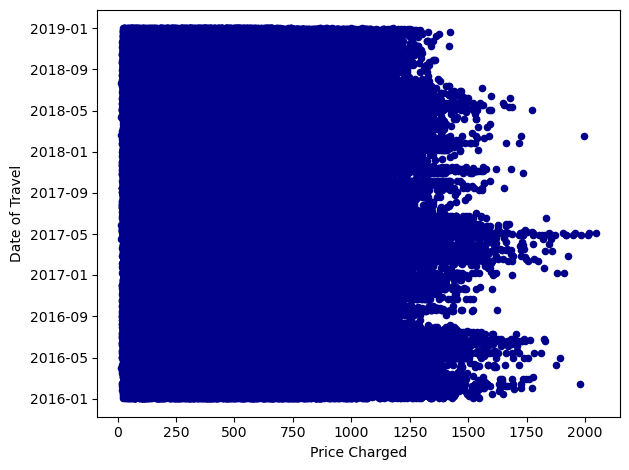

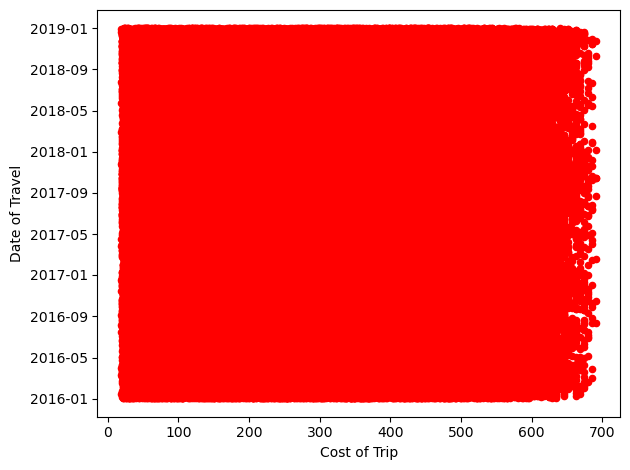

In [82]:

Price_charged_scatter = Merged_df.plot.scatter(x='Price Charged',
...                   y='Date of Travel',
...                   c='DarkBlue')

Cost_of_Trip_scatter = Merged_df.plot.scatter(x='Cost of Trip',
...                   y='Date of Travel',
...                   c='Red')

profile = ProfileReport(cab_df,title="Cab Data Profile"
profile.to_widgets()

In [20]:

Transaction_ID_df = pd.read_csv('/Users/sharonokech/Documents/Data_Glacier_Virtual_Internship/My_Tasks/DataSets/Transaction_ID.csv')
Transaction_ID_df.head(10)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


In [21]:
print('DataFrame shape:', Transaction_ID_df.shape)

print('DataFrame size:', Transaction_ID_df.size)

DataFrame shape: (440098, 3)
DataFrame size: 1320294


In [22]:
Transaction_ID_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [23]:
Transaction_ID_df.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [24]:
Transaction_ID_df.isnull()

,Transaction ID,Customer ID,Payment_Mode
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
440093,False,False,False
440094,False,False,False
440095,False,False,False
440096,False,False,False


In [25]:
Transaction_ID_df['Payment_Mode'].unique()

array(['Card', 'Cash'], dtype=object)

In [26]:
#Change Payment_Mode to category type
Transaction_ID_df['Payment_Mode'] = Transaction_ID_df['Payment_Mode'].astype('category')
Transaction_ID_df.dtypes

Transaction ID       int64
Customer ID          int64
Payment_Mode      category
dtype: object

In [27]:
#checking for duplicates in colums
Transaction_ID_df['Transaction ID'].duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
440093    False
440094    False
440095    False
440096    False
440097    False
Name: Transaction ID, Length: 440098, dtype: bool

In [28]:
#Customer column has duplicates implying one customer can own several transaction IDS.
Transaction_ID_df['Customer ID'].duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
440093     True
440094     True
440095     True
440096     True
440097     True
Name: Customer ID, Length: 440098, dtype: bool

In [29]:
#Transaction_ID_df.describe

In [30]:
city_df= pd.read_csv('/Users/sharonokech/Documents/Data_Glacier_Virtual_Internship/My_Tasks/DataSets/city.csv')
city_df.head(10)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [31]:
print('DataFrame shape:', city_df.shape)

print('DataFrame size:', city_df.size)

DataFrame shape: (20, 3)
DataFrame size: 60


In [32]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [33]:
city_df.isnull()

,City,Population,Users
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [34]:
city_df['City'].unique

<bound method Series.unique of 0          NEW YORK NY
1           CHICAGO IL
2       LOS ANGELES CA
3             MIAMI FL
4       SILICON VALLEY
5        ORANGE COUNTY
6         SAN DIEGO CA
7           PHOENIX AZ
8            DALLAS TX
9           ATLANTA GA
10           DENVER CO
11           AUSTIN TX
12          SEATTLE WA
13           TUCSON AZ
14    SAN FRANCISCO CA
15       SACRAMENTO CA
16       PITTSBURGH PA
17       WASHINGTON DC
18        NASHVILLE TN
19           BOSTON MA
Name: City, dtype: object>

In [35]:
city_df.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [36]:
#CustomerID Data
Customer_ID_df = pd.read_csv('/Users/sharonokech/Documents/Data_Glacier_Virtual_Internship/My_Tasks/DataSets/Customer_ID.csv')
Customer_ID_df.head(10)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [37]:
print('DataFrame shape:', Customer_ID_df.shape)

print('DataFrame size:', Customer_ID_df.size)

DataFrame shape: (49171, 4)
DataFrame size: 196684


In [38]:
Customer_ID_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [39]:
Customer_ID_df['Gender'] = Customer_ID_df['Gender'].astype('category')
Customer_ID_df.dtypes


Customer ID              int64
Gender                category
Age                      int64
Income (USD/Month)       int64
dtype: object

In [40]:


Customer_ID_df['Customer ID'].unique

<bound method Series.unique of 0        29290
1        27703
2        28712
3        28020
4        27182
         ...  
49166    12490
49167    14971
49168    41414
49169    41677
49170    39761
Name: Customer ID, Length: 49171, dtype: int64>

In [41]:
Customer_ID_df.describe(include='all')

,Customer ID,Gender,Age,Income (USD/Month)
count,49171.000000,49171,49171.000000,49171.000000
unique,NaN,2,NaN,NaN
top,NaN,Male,NaN,NaN
freq,NaN,26562,NaN,NaN
mean,28398.252283,NaN,35.363121,15015.631856
std,17714.137333,NaN,12.599066,8002.208253
min,1.000000,NaN,18.000000,2000.000000
25%,12654.500000,NaN,25.000000,8289.500000
50%,27631.000000,NaN,33.000000,14656.000000
75%,43284.500000,NaN,42.000000,21035.000000


# Correlation Analysis

In [42]:
Merged_df= cab_df.merge(Transaction_ID_df, on= 'Transaction ID').merge(city_df, on = 'City').merge(Customer_ID_df, on ='Customer ID')
Merged_df.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,"814,885","24,701",Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,"814,885","24,701",Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,"814,885","24,701",Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,"814,885","24,701",Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,"814,885","24,701",Male,27,9237
5,10324737,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,"814,885","24,701",Male,27,9237
6,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,"814,885","24,701",Male,27,9237
7,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,"814,885","24,701",Male,53,11242
8,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,"814,885","24,701",Male,53,11242
9,10186994,2017-06-23,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,"814,885","24,701",Male,53,11242


In [43]:
Merged_df.isnull()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,False,False,False,False,False,False,False,False,False,False,False,False,False,False
359388,False,False,False,False,False,False,False,False,False,False,False,False,False,False
359389,False,False,False,False,False,False,False,False,False,False,False,False,False,False
359390,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
Merged_df.dtypes

In [92]:
profile = ProfileReport(Merged_df,title="Carb Merged Data Profile")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
profile = ProfileReport(Merged_df,title="Carb Merged Data Profile")
profile.to_widgets()

## Correlation

In [ ]:
Merged_df.describe()

In [99]:
Merged_df.corr(method ='pearson')

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000


In [51]:
Merged_df.corr().style.background_gradient(cmap='RdYlGn', axis=None)

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000


### Observations:
Highest Correlation exist between: 


                                   KM Travelled and Cost of Trip= '0.981848', 
                                   Cost of Trip and Price Charged= '0.835753', and  
                                   KM Travelled and Price Charged= '0.835753'
Followed by:                       
                                   
                                   Customer_ID and the Price Charged

### Graphical Correlation Analysis

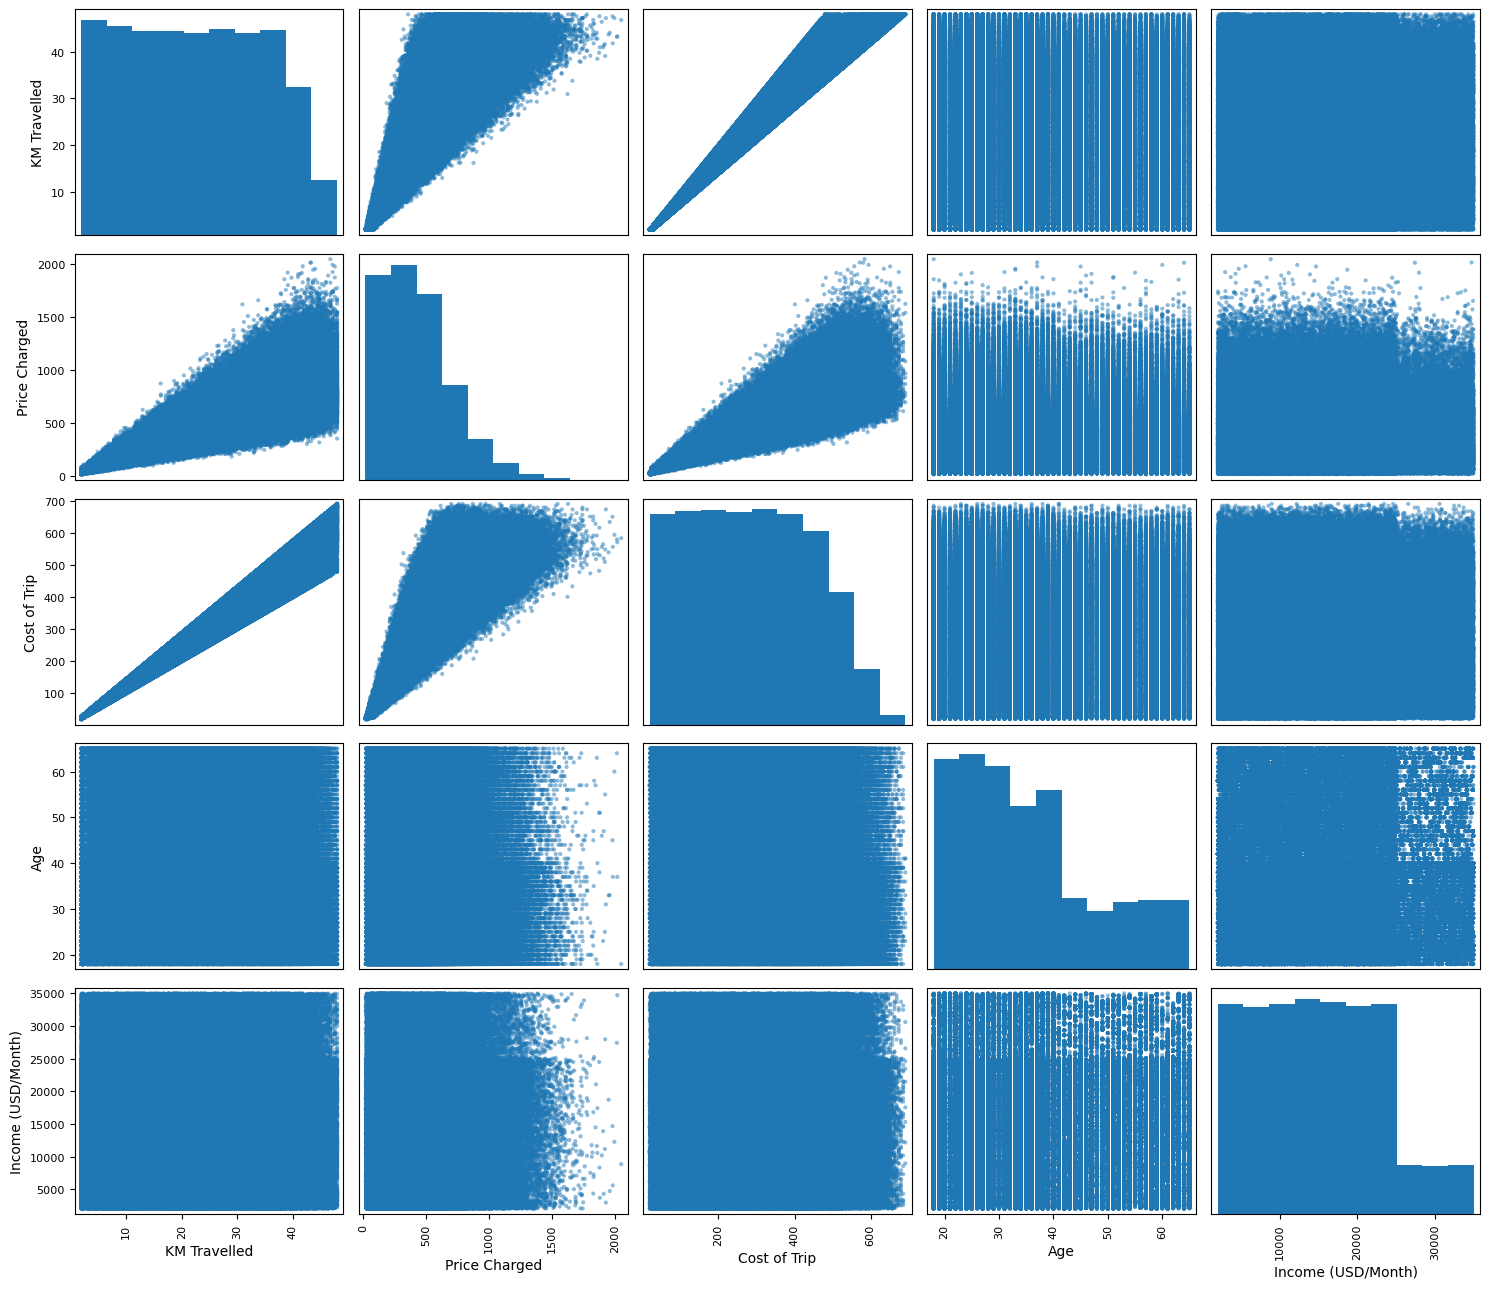

In [84]:
#Merged_df[['KM Travelled', 'Price Charged', 'Cost of Trip','Age','Income (USD/Month)']].plot.hist(alpha=0.5);
from pandas.plotting import scatter_matrix
scatter_matrix(Merged_df[['KM Travelled','Price Charged','Cost of Trip','Age','Income (USD/Month)' ]],figsize=(15, 13),);

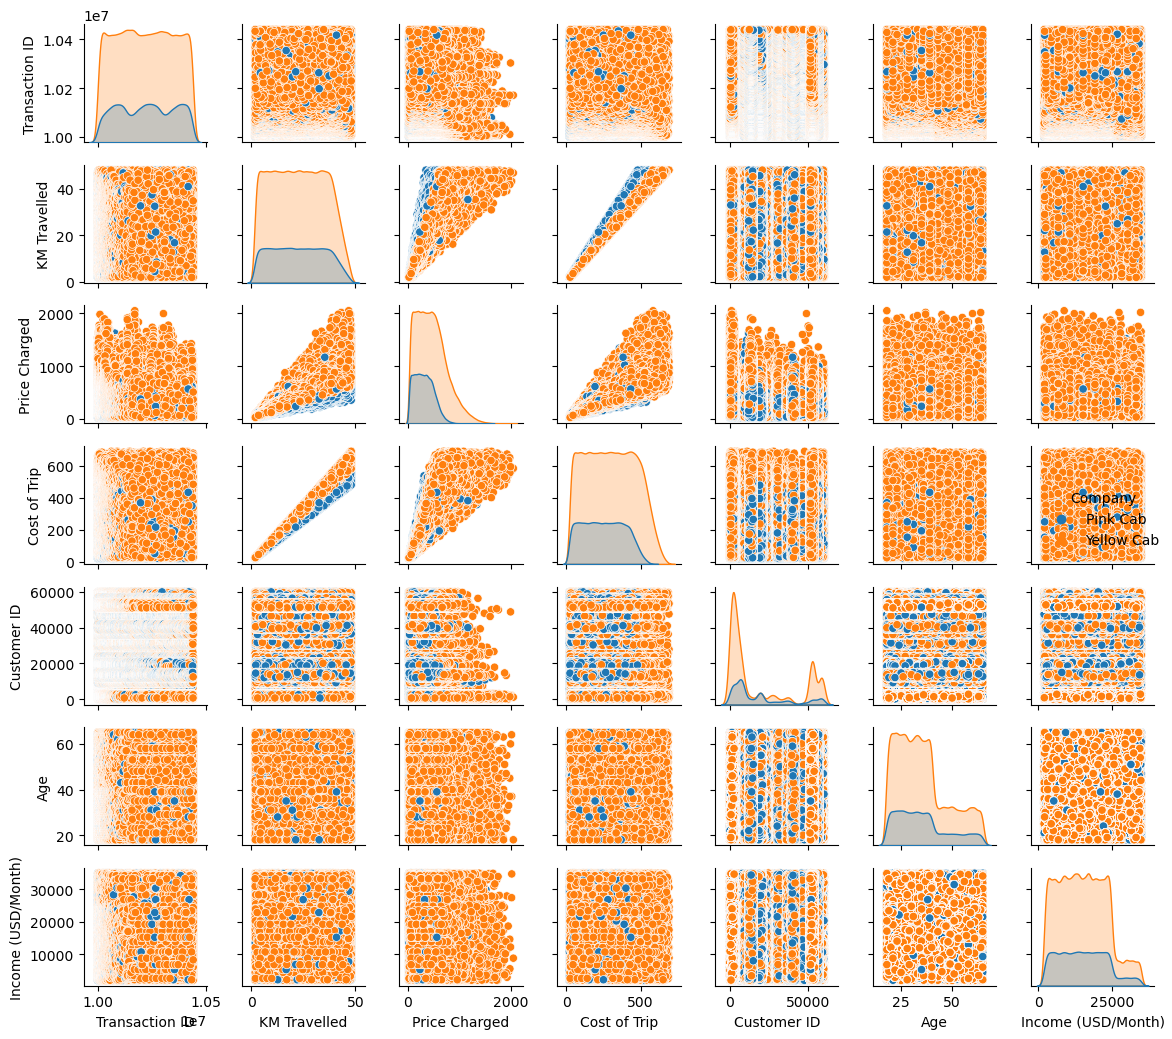

In [101]:
sns.pairplot(Merged_df, hue='Company', height=1.5)

## 3. Data Analysis
###  Outlier Identification

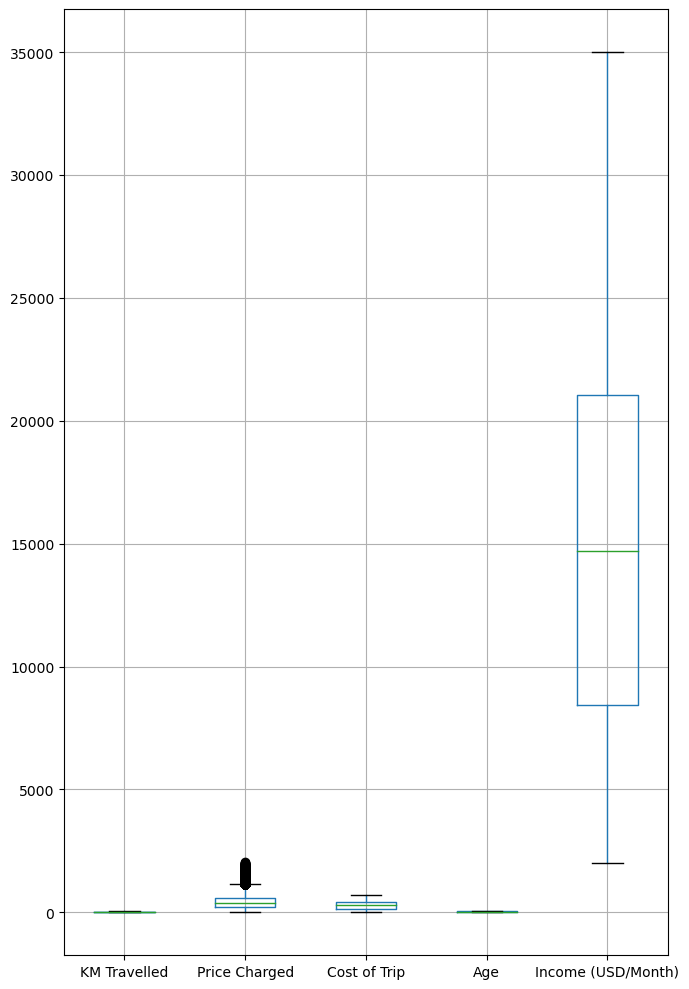

In [102]:
 
fig = plt.figure(figsize =(7, 10))
#plt.rcParams["figure.autolayout"] = True
Merged_boxplot= Merged_df.boxplot(column=['KM Travelled', 'Price Charged', 'Cost of Trip','Age','Income (USD/Month)'])
#price_charged has outliers

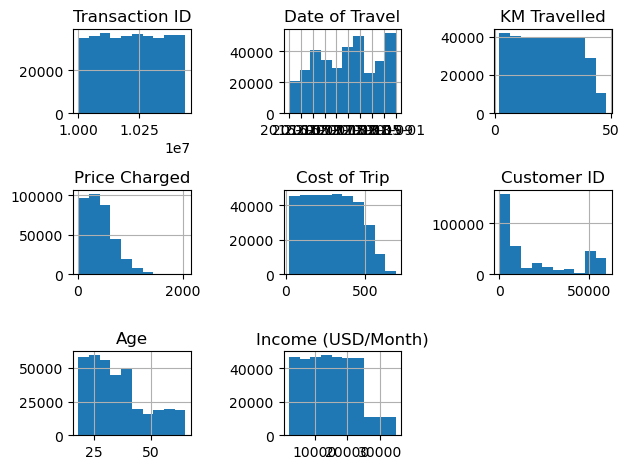

<Figure size 1000x1000 with 0 Axes>

In [89]:
Merged_df.hist()
fig = plt.figure(figsize =(10, 10))

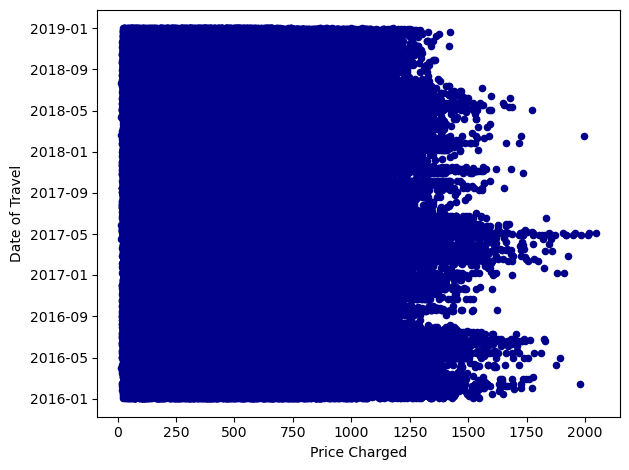

In [79]:

Price_charged_scatter = Merged_df.plot.scatter(x='Price Charged',
...                   y='Date of Travel',
...                   c='DarkBlue')